In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss

In [2]:
data=pd.read_csv('D:\\exe_file\\machine_learning\\csv_files\\Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
real_x=data.iloc[:,1:2].values
real_y=data.iloc[:,2].values
real_y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [4]:
linear_reg=LinearRegression()
linear_reg.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

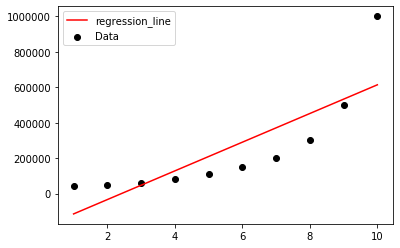

In [5]:
plt.scatter(real_x,real_y,color='black',label='Data')
plt.plot(real_x,linear_reg.predict(real_x),color='red',label='regression_line')
plt.xlabel=("Position Label")
plt.ylabel=("Salary")
plt.title=("Linear Model")
plt.legend()
plt.show()

In [6]:
polynomial_reg=PolynomialFeatures(degree=4)
real_x_poly=polynomial_reg.fit_transform(real_x)

polynomial_reg.fit(real_x_poly,real_y)
linear_reg2=LinearRegression()
linear_reg2.fit(real_x_poly,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
real_x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

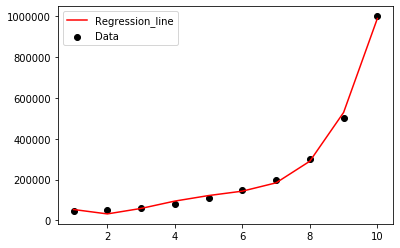

In [8]:
plt.scatter(real_x,real_y,color='black',label='Data')
plt.plot(real_x,linear_reg2.predict(polynomial_reg.fit_transform(real_x)),color='red',label='Regression_line')
plt.title=('Polynomial Model')
plt.xlabel=('Position Level')
plt.ylabel=('Salary')
plt.legend()
plt.show()

In [9]:
a1=linear_reg.predict(real_x)
a1

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [10]:
real_y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [11]:
a2=linear_reg2.predict(polynomial_reg.fit_transform(real_x))
a2

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

In [12]:
real_y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [13]:
linear_reg.coef_

array([80878.78787879])

In [14]:
linear_reg.intercept_

-195333.3333333332

In [15]:
f=[(a1[i]-real_y[i])**2 for i in range(10)]
f  

[25425752066.11567,
 6984907254.361784,
 161213039.48576453,
 2321487603.3057904,
 9813003673.094585,
 19583033976.124897,
 29178851239.669422,
 23011970615.243332,
 1061179981.6345266,
 149417388429.7521]

In [16]:
sum=0
for i in f:
    sum+=i
sum    
    

266958787878.78787

In [17]:
std_error=((sum/len(real_y)-2)**0.5)/100000
print("-----------standard error of simple linear regression model-----------")
std_error

-----------standard error of simple linear regression model-----------


1.6338873518660577

In [18]:
f2=[(a2[i]-real_y[i])**2 for i in range(10)]
f2

[69833488.19284137,
 332701001.4053064,
 1843644.8942805508,
 214120800.52892935,
 137474258.45406,
 45224841.203544214,
 255888124.1139304,
 100116584.0775746,
 823382289.8091977,
 122853195.75851965]

In [19]:
sum2=0
for i in f2:
    sum2+=i
sum2    
    

2103438228.438184

In [20]:
std_error2=((sum2/len(real_y)-2)**0.5)/100000
print("-----------standard error of polynomial regression model------------")
std_error2

-----------standard error of polynomial regression model------------


0.14503234840676696